# Setup

Utility section to read if you want to run this notebook.

The packages needed to run this notebook are listed in the requirements.txt file.

In a terminal, after having created a new envrionment, you can simply run:
```
pip install -r requirements.txt
```

For the notebook to work properly, you must place it in the same folder as the `model_torch.pth`, `utils.py`, `rossler_map.py` and `time_series.py` files.


# Packages Imports

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import torch
from rossler_map import RosslerMap
from time_series import FinalModel
from utils import Dynamics, Statistics, plot3D_traj

# Load models

Load trained model

In [3]:
checkpoint_path = Path("model_torch.pth")

trained_model = FinalModel(
    hidden_size=15,
    delta_t=0.001,
    mean=np.array([0.1756855, -0.87666973, 0.87665153]),
    std=np.array([5.11818165, 4.81725634, 2.88779878]),
)

trained_model.load_state_dict(torch.load(checkpoint_path))
trained_model.normalize = False
trained_model.eval()

FinalModel(
  (layers): Sequential(
    (0): Linear(in_features=3, out_features=15, bias=True)
    (1): ReLU()
    (2): Linear(in_features=15, out_features=15, bias=True)
    (3): ReLU()
    (4): Linear(in_features=15, out_features=15, bias=True)
    (5): ReLU()
    (6): Linear(in_features=15, out_features=3, bias=True)
  )
)

Load ground thruth model

In [8]:
rossler_map_true = RosslerMap(delta_t=trained_model.delta_t)

# Set hyperparameters for trajectories

In [5]:
TRAJECTORY_DUR = 1000
nb_steps = int(TRAJECTORY_DUR // trained_model.delta_t)
init_pos = [
    0.01,
    2.5,
    3.07,
]  # Init position different from the one used for training which was [-5.75, -1.6, 0.02]
save_dir_path = checkpoint_path.parent

## Compute trajectories

In [ ]:
# # Train set
# traj_pred, traj_true, time_list = compute_pred_true_traj(
#     trained_model, rossler_map_true, init_pos, nb_steps
# )

## Load already computed trajectories

In [ ]:
traj_pred = np.load(os.path.join(save_dir_path, "traj_pred_test.npy"))
traj_true = np.load(os.path.join(save_dir_path, "traj_true_test.npy"))
time_list = np.load(os.path.join(save_dir_path, "time_list_test.npy"))

# Compute metrics

## Statistics

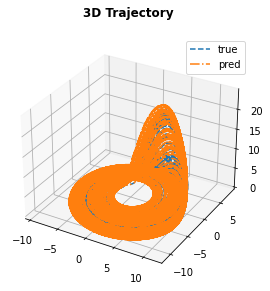

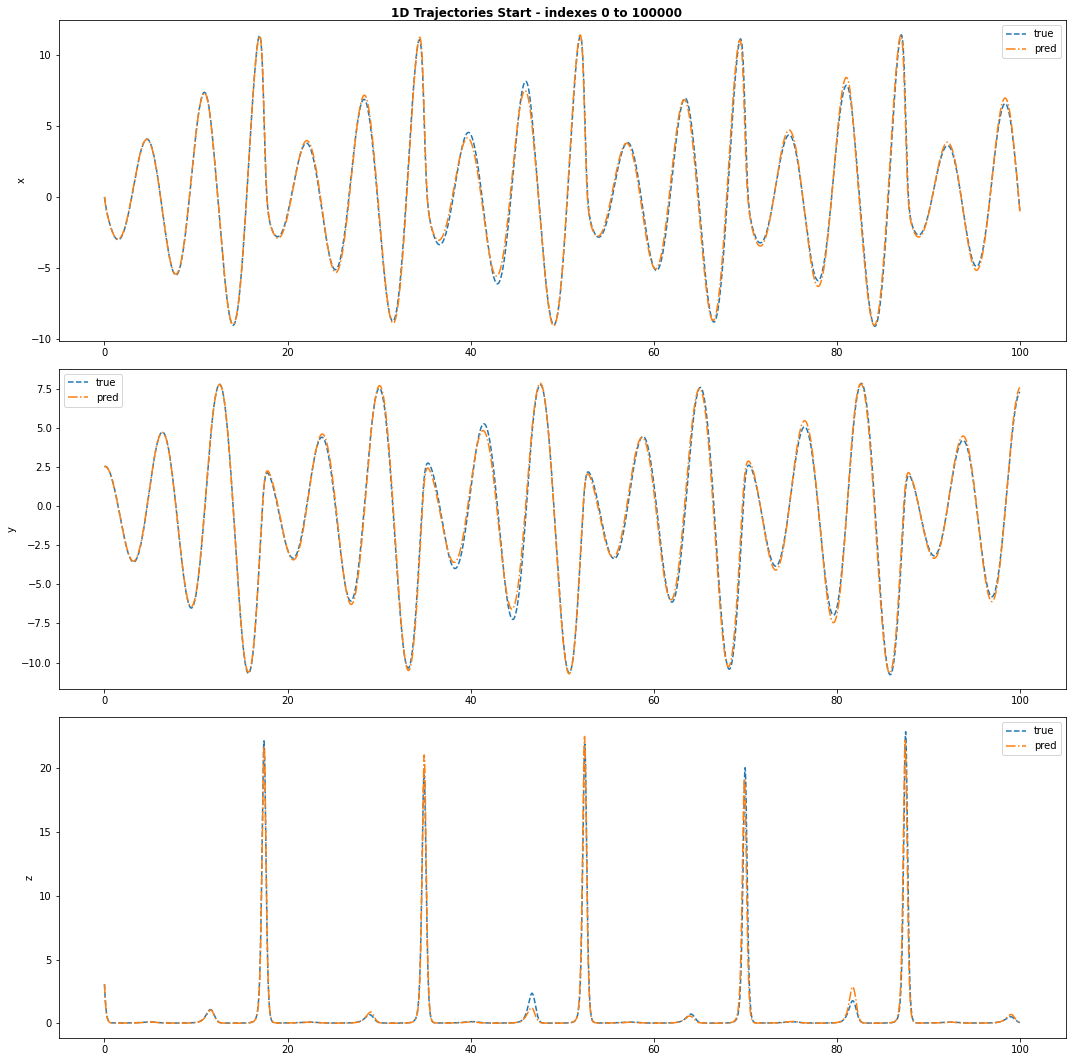

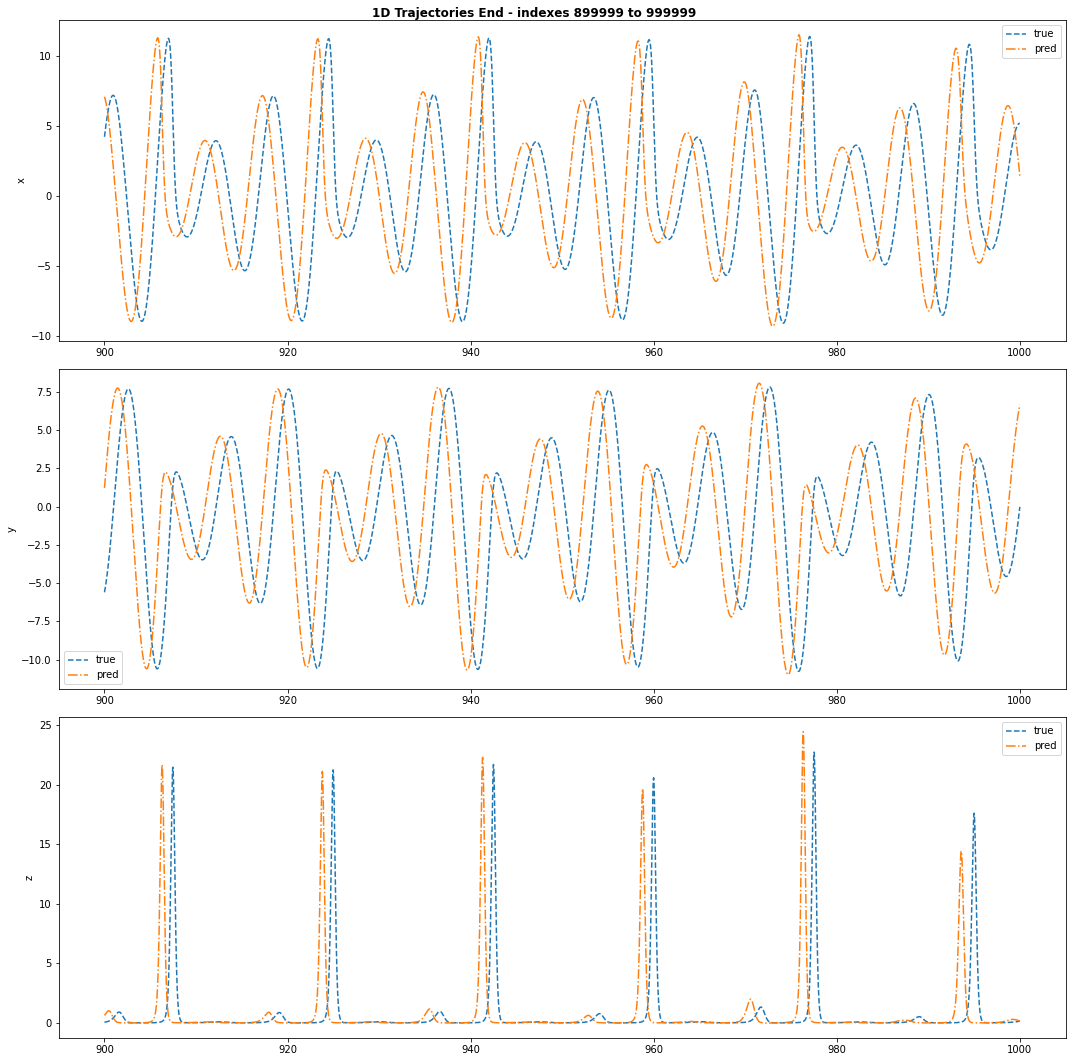

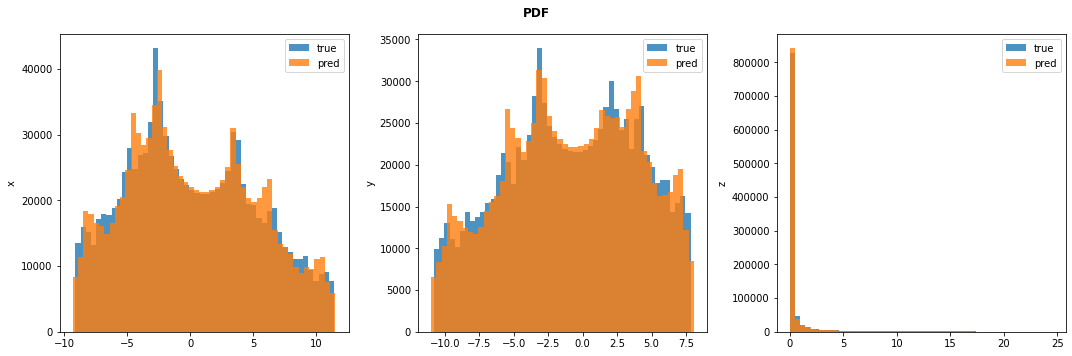

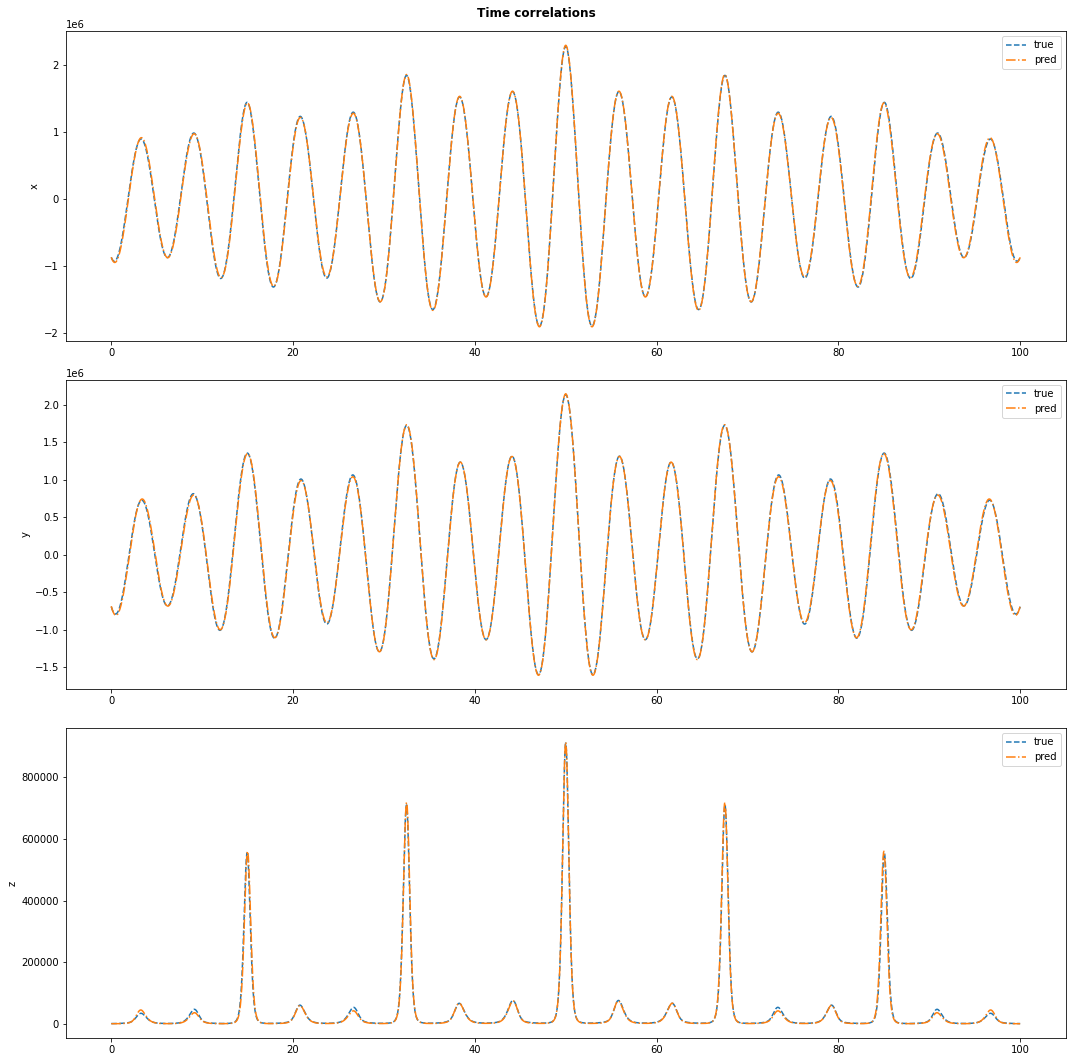

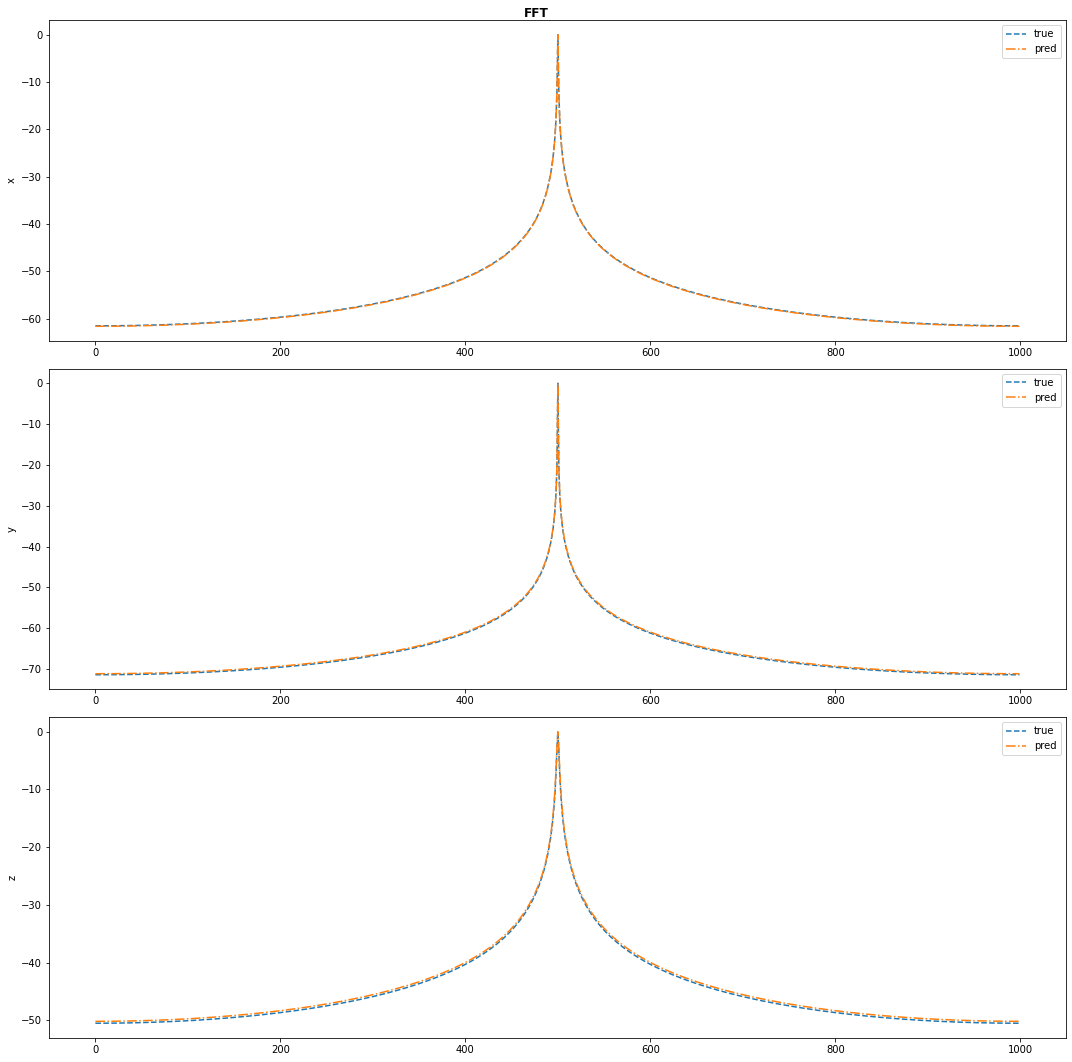

In [6]:
stats = Statistics(wandb_logger=None, ts_n=100000)
stats.add_traj(traj_true=traj_true, traj_pred=traj_pred, time_list=time_list)
stats.plot_all()

## Dynamics

In [7]:
dym = Dynamics(
    wandb_logger=None, true_model=rossler_map_true, trained_model=trained_model, max_it=nb_steps
)
dym.add_traj(traj_true=traj_true, traj_pred=traj_pred)
dym.compute_all()

  1%|          | 10316/999999 [00:19<31:14, 527.89it/s]


KeyboardInterrupt: 